# 2. 선형 회귀 모델

---

## 학습 목표
- 선형 모델의 정의를 학습합니다.
- 1차 함수의 형태를 이해하고 하이퍼파라미터에 따라 그래프가 어떻게 변화하는지 이해합니다.

---

## 목차

### 1. 선형 함수 정의
1. 회귀 모델의 종류
2. 선형 회귀란
3. 선형 회귀의 장단점

### 2. 1차 함수 그리기
1. 1차 함수 하이퍼 파라미터에 따른 그래프



---

## 1. 선형 함수 정의

### 1-1. 회귀 모델의 종류

**회귀 분석**은 크게 선형 관계 모델을 사용하여 특성 데이터와 레이블 데이터의 상관 관계를 분석하는 **선형 회귀 분석**과 선형 관계가 아닌 모델인 **비선형 회귀 모델**로 나누어 집니다.

<img src="img/2-1-1.png" width="50%" height="50%" title="회귀 분석" alt="회귀 분석"></img>

**선형 회귀**의 경우, 선형이라는 특성 덕분에 수학적 분석이 매우 쉽습니다. 따라서 데이터의 분포가 선형 모델의 분포를 갖는다 생각하면 선형 모델을 사용하는 것이 빠르고 쉬운 분석이 가능합니다.

선형 회귀 모델이 아닌 **비선형 회귀 모델**의 경우, 수식이 다소 복잡하고 분석이 어려울 수 있지만 선형 회귀에서 불가능한 데이터의 분포를 분석할 수 있습니다. **비선형 회귀 모델**의 경우 더욱 정확한 성능을 보일 수 있지만, 높은 모델의 복잡성과 최적화 과정이 항상 최적의 해를 구할 수 없다는 단점이 있습니다. 

### 1-2. 선형 회귀란

앞서 정의한 내용과 같이 선형 관계 모델을 사용한 분석 방법을 의미합니다. 예를 들어 총 4개의 샘플을 갖는 데이터가 있다고 가정해 봅시다.

첫 번째 **feature 데이터**는 $1$, **label 데이터**는 $3.1 $, 두 번째 **feature 데이터**는 $2$, **label 데이터**는 $4.9$ 같은 방식으로 4개 샘플 데이터를 표현하면 아래와 같습니다.

##### feture 데이터 

> $$ X=\begin{pmatrix}
1 \\ 
2 \\ 
3 \\ 
4
\end{pmatrix},\;\;\;$$ 

##### label 데이터  

> $$ Y=\begin{pmatrix}
3.1 \\ 
4.9 \\ 
7.2 \\ 
8.9
\end{pmatrix}.$$

$X$와 $Y$의 관계가 보이나요? 보이지 않는다면 **feature 데이터** $X$에 2배를 해봅시다.

##### feture 데이터 

> $$ 2X=\begin{pmatrix}
2 \\ 
4 \\ 
6 \\ 
8
\end{pmatrix},\;\;\;$$ 

##### label 데이터 


> $$ Y=\begin{pmatrix}
3.1 \\ 
4.9 \\ 
7.2 \\
8.9
\end{pmatrix}.$$

아까 전보단 비슷해졌지만 아직 차이가 보입니다. 그렇다면 여기에 1을 더해봅시다.

##### feture 데이터 

> $$ 2X+1=\begin{pmatrix}
3 \\ 
5 \\ 
7 \\ 
9
\end{pmatrix},\;\;\;$$ 

###### label 데이터 

> $$ Y=\begin{pmatrix}
3.1 \\ 
4.9 \\ 
7.2 \\ 
8.9
\end{pmatrix}.$$

같진 않지만 매우 비슷해 졌습니다. 이 경우 우리는 다음과 같이 표현해 볼 수 있습니다.

##### feature 데이터와 label 데이터의 관계 표현

> $$Y \approx 2X+1$$

$\approx$은 같진 않지만 비슷하다는 표현입니다. 이와 같이 feature 데이터에 **상수 배만큼에 또 다른 상수를 더해주는 형태**를 선형 회귀 모델이라고 합니다. 

조금 더 명확하게 표현하기 위해서, 각 label 데이터 마다의 식으로 아래와 같이 표현이 가능합니다.

##### i번째 lable 데이터에  대응하는 선형 회귀 분석 모델 함수

> $$
\begin{aligned}
y_i &\approx f(x_i) = 2x_i+1 \\
ex)\;  3.1 &\approx f(1)=2*1+1=3
\end{aligned}
$$

**곱해주는 상수와 더해주는 상수**는 선형 파라미터라 하고 우리는 이 파라미터를 조절하여 모델을 정확하도록 튜닝합니다.

##### <예제 1> label 데이터와 선형 회귀 분석 모델 근사값

위 예시로 사용했던 feature 데이터, label 데이터, 근사선 모델을 사용하여 근사값과 label 데이터를 출력해 봅시다.

In [2]:
import numpy as np

X = np.array([1, 2, 3, 4]).reshape((-1,1))
Y = np.array([3.1, 4.9, 7.2, 8.9]).reshape((-1,1))

print("2X+1: \n{}\n".format(2*X+1))
print("Y: \n{}\n".format(Y))

2X+1: 
[[3]
 [5]
 [7]
 [9]]

Y: 
[[3.1]
 [4.9]
 [7.2]
 [8.9]]



### 1-3. 선형 회귀의 장단점

- **장점**: 선형 관계 모델을 사용하기에 분석하기에 쉽습니다.

    -> 선형성을 갖는 모델은 비선형 모델에 비하여 그 해결법들이 공식으로 잘 정의되어 있습니다. 따라서 모델 파라미터의 튜닝 과정이 보다 빠르게 진행됩니다.

- **단점**: 데이터 분포가 선형 모델로 표현이 되지 않는다면 분석하기 어렵습니다.

    -> 로그 함수나 삼각 함수와 같은 형태로 데이터가 분포한다면 이는 선형 회귀 모델로 구현하기 어렵습니다.

---

#### 심화 학습 - 수학적 정의

선형 회귀란 N개의 샘플을 갖는 데이터에서 레이블 데이터 $Y$와 $p$개의 특성을 가진 $X$ 사이의 선형 관계를 모델링한 것을 의미합니다.

선형 관계 식은 아래와 같이 정의됩니다.

##### 선형 관계 식

> $$Y=\begin{pmatrix}
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_N
\end{pmatrix}, \;\;\;\;\; X=\begin{pmatrix}
\mathbf{x_1}^T \\ 
\mathbf{x_2}^T \\ 
\vdots \\ 
\mathbf{x_N}^T
\end{pmatrix}=\begin{pmatrix}
1 & x_{1,1} & ... & x_{1,p} \\ 
1 & x_{2,1} & ... & x_{2,p} \\ 
1 & \vdots  & \ddots  & \vdots \\ 
1 & x_{N,1} & ... & x_{N,p}
\end{pmatrix}, \;\;\;\;\; \mathbf{w}=\begin{pmatrix}
w_0 \\
w_1 \\ 
w_2 \\ 
\vdots \\ 
w_p
\end{pmatrix}, \;\;\;\;\; \boldsymbol{\epsilon}=\begin{pmatrix}
\epsilon_1 \\ 
\epsilon_2 \\ 
\vdots \\ 
\epsilon_N
\end{pmatrix}, \;\;\;\;\; \mathbf{x_i}=\begin{pmatrix}
x_{i,1} \\ 
x_{i,2} \\ 
\vdots \\ 
x_{i,p}
\end{pmatrix}$$

> $$Y=X\mathbf{w}+\boldsymbol{\epsilon}$$.

$\mathbf{w}$ 는 선형 파라미터를 의미하며 $\boldsymbol{\epsilon}$은 오차를 의미합니다. 

위의 예시에서 보여준 $Y \approx 2X+1$과 좀 다른 것이 아닐까 생각할 수 있지만 다음과 같이 표현하면 결국 같은 표현임을 알 수 있습니다.

##### 선형 관계식 예

> $$Y=\begin{pmatrix}
3.1 \\ 
4.9 \\ 
7.2 \\ 
8.9
\end{pmatrix}, \;\;\;\;\; X=\begin{pmatrix}
1 & 1 \\ 
1 & 2 \\ 
1 & 3 \\ 
1 & 4
\end{pmatrix}, \;\;\;\;\; \mathbf{w}=\begin{pmatrix}
1 \\ 
2
\end{pmatrix}, \;\;\;\;\; \boldsymbol{\epsilon}=\begin{pmatrix}
0.1 \\ 
-0.1 \\ 
0.2 \\ 
-0.1
\end{pmatrix}, \;\;\;\;\; $$

> $$\begin{pmatrix}
3.1 \\ 
4.9 \\ 
7.2 \\ 
8.9
\end{pmatrix} = \begin{pmatrix}
1 & 1 \\ 
1 & 2 \\ 
1 & 3 \\ 
1 & 4
\end{pmatrix}\begin{pmatrix}
1 \\ 
2
\end{pmatrix}+\begin{pmatrix}
0.1\\ 
-0.1\\ 
0.2\\ 
-0.1
\end{pmatrix}.$$

**예측 값 $\widehat{y_i}$ 정의하기**

실제 $i$번째 샘플 데이터 $y_i$와 예측한 데이터 $\widehat{y_i}$는 다르기에 아래와 같이 표현이 가능합니다.

##### i 번째 샘플 데이터와 예측 데이터 표현

> $$
\begin{aligned}
y_i &= \widehat{y_i} +\epsilon_i,
\end{aligned}
$$

샘플 데이터 $y_i$는 예측 데이터 $\widehat{y_i}$와 $\epsilon_i$ 크기만큼의 차이가 있습니다. 예측 데이터는 $x_i$에 대한 함수 $f(x_i)$로 표현 가능합니다.

##### i 번째 예측 선형 회귀 모델

> $$
\begin{aligned}
\widehat{y_i}&=f(x_i)
\end{aligned}
$$

이해를 돕기 위해 계속 사용했던 4개 데이터 $[1, 2, 3, 4]^{T}$ 예시를 $f()$ 함수로 표현하면 다음과 같습니다.

##### f()을 사용한 예측 데이터 표현 예

> $$
\begin{aligned}
\widehat{y_i}&=f(x_i) \\
&=2x_i+1
\end{aligned}
$$

벡터 형태의 입력을 받는 $f()$ 함수를 스칼라를 입력으로 받는 함수로 표현하면 아래와 같습니다.

##### 스칼라 입력 f()

> $$
\begin{aligned}
f(1) &=2*1+1=3 \\
f(2) &=2*2+1=5 \\
f(3) &=2*3+1=7 \\
f(4) &=2*4+1=9
\end{aligned}
$$

**선형성**

위 정의한 $f()$ 함수는 선형 회귀 모델이기에 아래의 선형성(linearity) 조건 2가지를 만족합니다. 

##### superposition

> $$f(A+B)=f(A)+f(B) \;\;$$ 

##### homogeneity

> $$f(\alpha A)=\alpha f(A) \;\;$$ 

A와 B는 크기가 같은 벡터이고 $\alpha$는 임의의 상수를 의미합니다. 따라서 $f()$ 함수가 위 2가지 성질을 만족하지 못한다면 비선형 회귀입니다.

##### 선형 회귀 모델 예

> $$f(x_i)=3x_i+1$$

> $$f(x_i)=-2x_i+2$$

##### 비선형 회귀 모델 예

> $$f(x_i)=20x_i-2x_{i}^{2} +3$$

> $$f(x_i)=2-e^{0.4x_i-1}$$

> $$f(x_i)=\frac{x_i}{4 - x_i}$$

##### <예제 2> 선형 회귀 모델과 비선형 회귀 모델 시각화

위 예시 모델들을 코드로 구현하여 시각화 해봅시다.

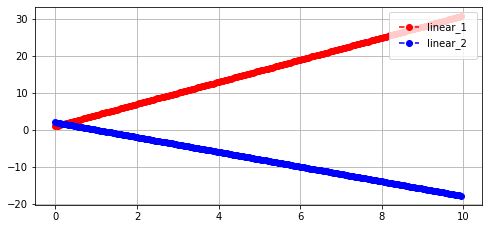

C:\Users\user\Anaconda3\envs\imagecaptioning\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide


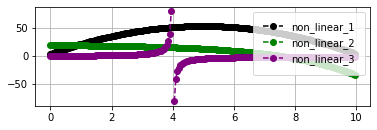

In [7]:
import matplotlib.pyplot as plt

# 그래프의 x 축 범위 설정
x_range = np.arange(0,10,0.05)

# 선형모델 2가지 선언
linear_model_1 = 3*x_range + 1
linear_model_2 = -2*x_range + 2

# 그래프 사이즈
plt.figure(figsize=(8, 8))

# 선형 그래프 2개 출력
plt.subplot(211)
plt.plot(x_range, linear_model_1, marker='o', label='linear_1',
        color='red',
        linestyle='--')

plt.plot(x_range, linear_model_2, marker='o', label='linear_2',
        color='blue',
        linestyle='--')

# 레전드 표시
plt.legend(
        loc='upper right',
        borderpad=1
    )

plt.grid()
plt.show()

# 비선형 모델 2가지 선언
non_linear_model_1 = 20*x_range - 2*x_range**2 + 3
non_linear_model_2 = 20 - np.exp(0.4*x_range )
non_linear_model_3 = x_range / (4 - x_range)


# 비선형 모델 2개 출력
plt.subplot(212)
plt.plot(x_range, non_linear_model_1, marker='o', label='non_linear_1',
        color='black',
        linestyle='--')

plt.plot(x_range, non_linear_model_2, marker='o', label='non_linear_2',
        color='green',
        linestyle='--')

plt.plot(x_range, non_linear_model_3, marker='o', label='non_linear_3',
        color='purple',
        linestyle='--')

# 레전드 표시
plt.legend(
        loc='upper right',
        borderpad=1
    )

plt.grid()
plt.show()

더 깊게 공부하고 싶다면 선형대수학 및 https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80 을 참고해 봅니다.

---